In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lucheol/in243/master/aula2/car-prices.csv')
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
swap = {
    'yes': 1,
    'no': 0
}
df['sold'] = df['sold'].map(swap)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
df['model_age'] = 2020 - df['model_year']
df['km_per_year'] = df['mileage_per_year'] * 1.60934
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age,km_per_year
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [7]:
x = df[['price','model_age','km_per_year']]
y = df['sold']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score

pd.np.random.seed(5)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) * 100


/Users/lucheol/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


57.99999999999999

In [32]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
dummy_stratified.score(teste_x, teste_y) * 100

52.44

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size=0.25, stratify=y)

model = DecisionTreeClassifier()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
accuracy_score(teste_y, previsoes) * 100

71.6

In [39]:
#exemplo de export/import de model
from joblib import dump, load
dump(model, 'tree_model.joblib')
loaded_model = load('tree_model.joblib')

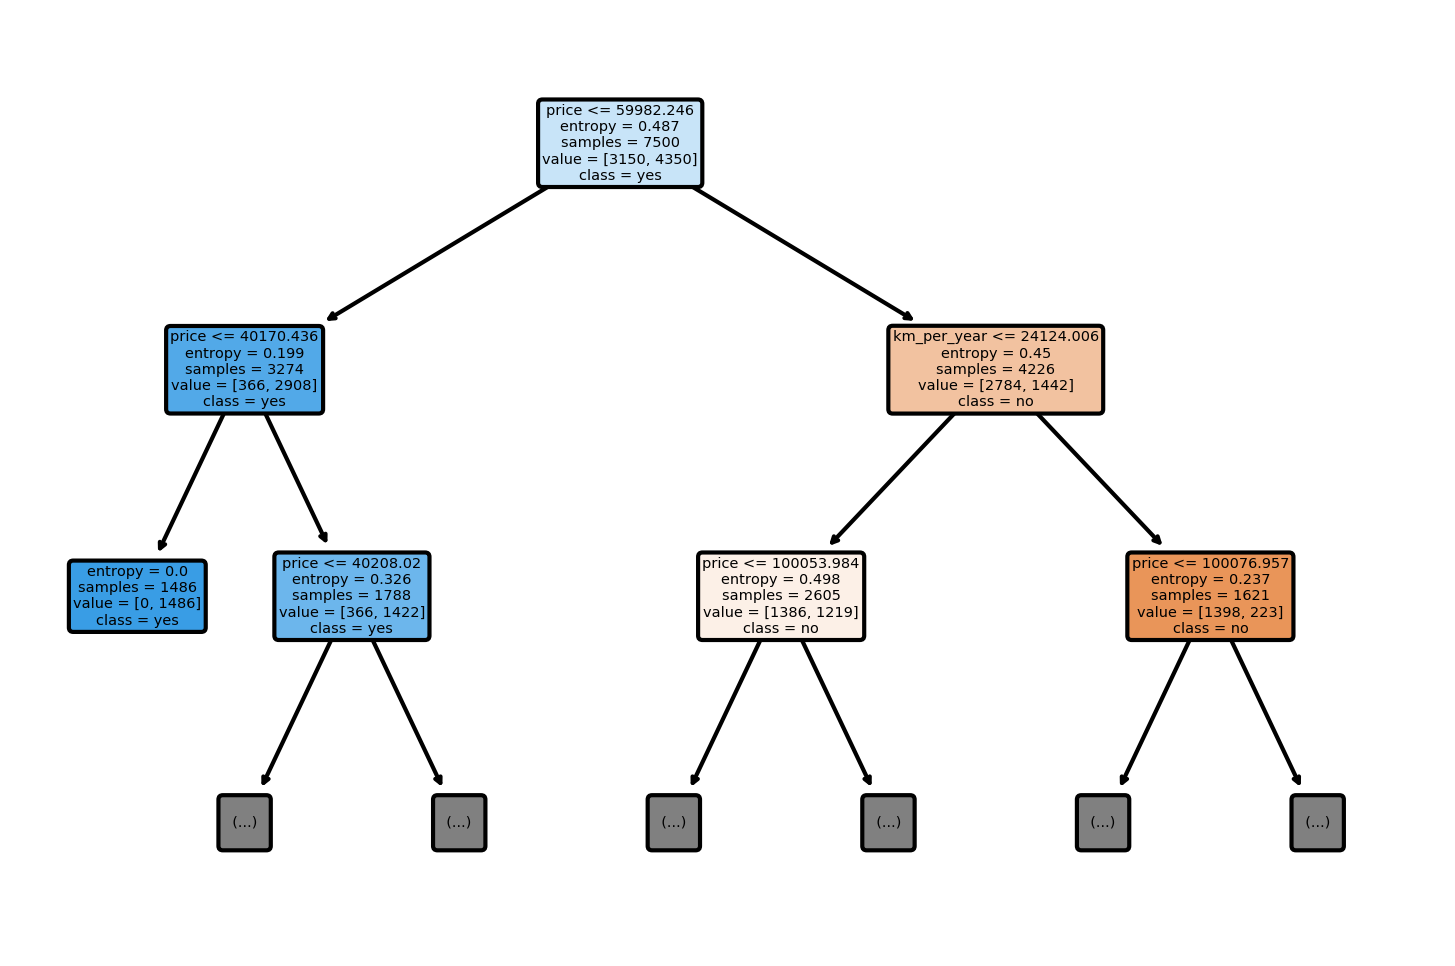

In [59]:
# visualizar regras de decisão da arvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

features = x.columns

plt.figure(dpi=300)
plot_tree(model, max_depth=2, 
          filled=True, 
          feature_names=features, 
          rounded=True,
          class_names = ['no', 'yes']
         )
plt.show()